In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.shape

(50000, 8)

In [4]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [5]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
df.isnull().sum()


unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

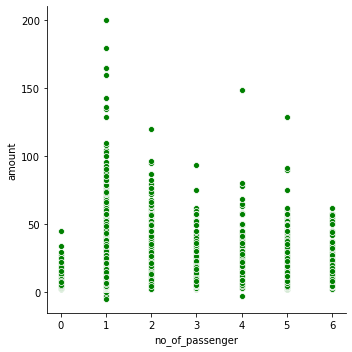

In [7]:
sns.relplot(x='no_of_passenger',y='amount',data=df,color='green')

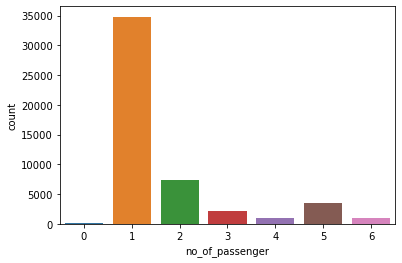

In [8]:
# no_of_passenger
sns.countplot(x='no_of_passenger',data=df)

In [9]:
df.rename(columns=({ 'longitude_of_pickup': 'lon1', 'latitude_of_pickup': 'lat1','longitude_of_dropoff': 'lon2', 'latitude_of_dropoff': 'lat2'}), inplace=True,)




In [10]:
import math

def distance1(lon1, lon2, lat1 , lat2):
    R = 6371*1000  
    p= lat1 * math.pi/180
    q= lat2 * math.pi/180
    r= (lat2-lat1) * math.pi/180
    s= (lon2-lon1) * math.pi/180
    a = math.sin(r/2) * math.sin(r/2) + math.cos(p) * math.cos(q) *math.sin(s/2) * math.sin(s/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c/1000
    return d

In [11]:
# making a column by d=[]
d=[]
for i in range(df.shape[0]):
    d.append(distance1(df["lon1"][i],
                      df["lon2"][i],
                      df["lat1"][i],
                      df["lat2"][i]))

In [12]:
df["distance_in_km"]=d

In [13]:
df.head()

,unique_id,amount,date_time_of_pickup,lon1,lat1,lon2,lat2,no_of_passenger,distance_in_km
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [14]:
# Dropping Longitude and Latitude Features

df.drop(["lat1", "lon1", "lat2", "lon2"], axis=1, inplace=True)

In [15]:
df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"])

In [17]:
# Mapping days and Weekname
names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

df["day"] = df["date_time_of_pickup"].dt.weekday.map(names)

In [18]:
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance_in_km,day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,1.030764,Sunday
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,8.450134,Monday
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.389525,Wednesday
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,2.799270,Friday
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.999157,Monday


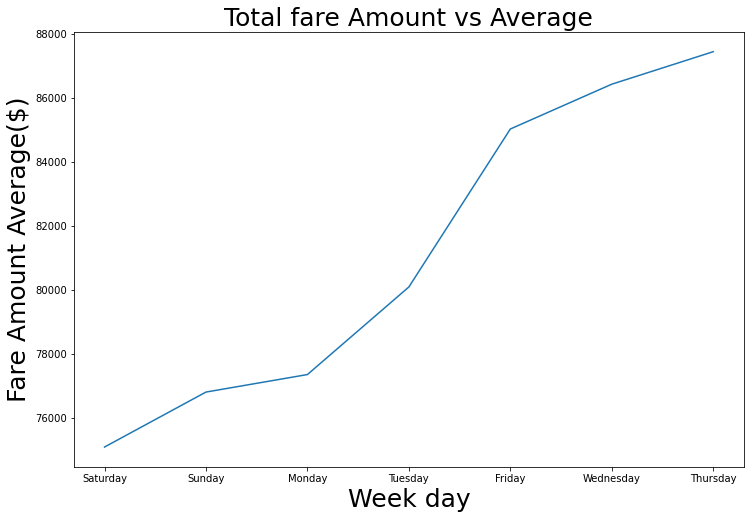

In [19]:
plt.figure(figsize = (12,8))
df.groupby("day")["amount"].sum().sort_values().plot()

plt.xlabel("Week day", fontsize=25)
plt.ylabel("Fare Amount Average($)", fontsize=25)
plt.title("Total fare Amount vs Average", fontsize=25)
plt.show()

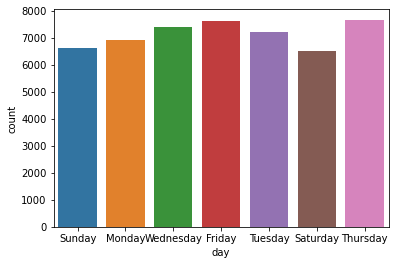

In [20]:
sns.countplot(x='day',data=df)

In [21]:
num = {"Sunday":0, "Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6}


In [22]:
df["day"] = df["day"].map(num)

In [23]:
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance_in_km,day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,1.030764,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,8.450134,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.389525,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,2.799270,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.999157,1


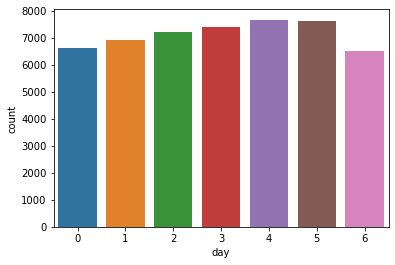

In [24]:
sns.countplot(x='day',data=df)

In [25]:
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance_in_km,day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,1.030764,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,8.450134,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.389525,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,2.799270,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.999157,1


In [26]:
df["Hour"] = df["date_time_of_pickup"].dt.hour
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance_in_km,day,Hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,1.030764,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,8.450134,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.389525,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,2.799270,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.999157,1,7


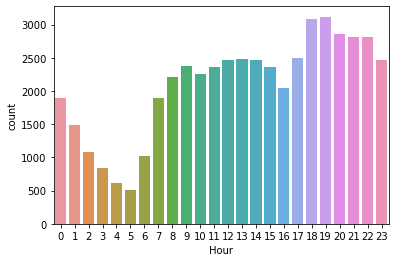

In [27]:
sns.countplot(x='Hour',data=df)

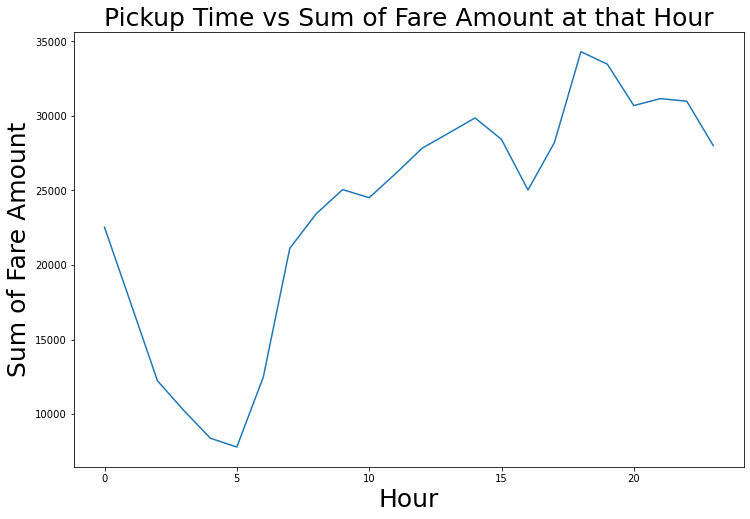

In [28]:
# Pickup Time vs Sum of Fare Amount at that Hour
plt.figure(figsize = (12,8))

df.groupby("Hour")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=25)
plt.xlabel("Hour", fontsize=25)
plt.ylabel("Sum of Fare Amount", fontsize=25)
plt.show()

In [29]:
df["Month_Day"] = df["date_time_of_pickup"].dt.day


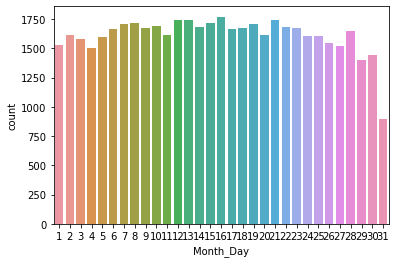

In [30]:
sns.countplot(x='Month_Day',data=df)

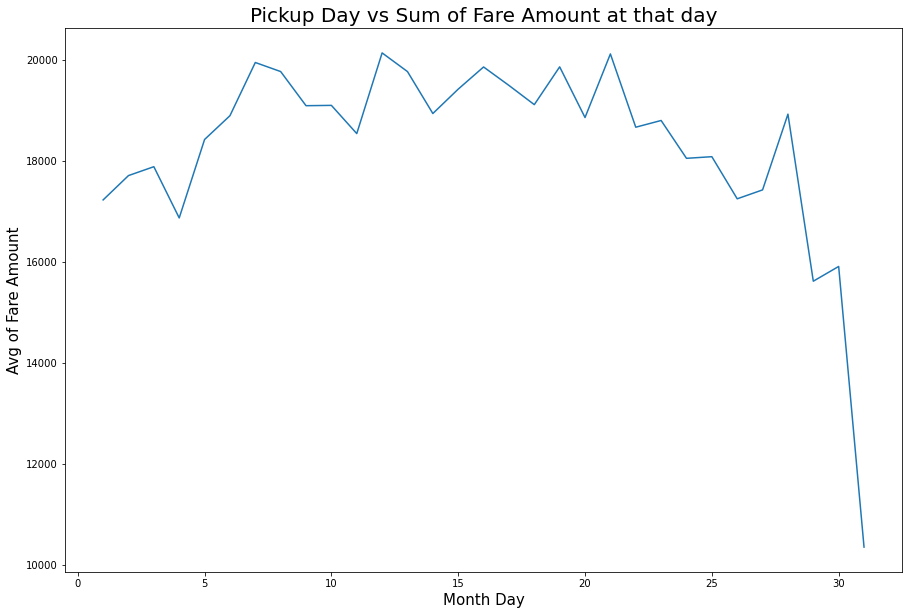

In [31]:
plt.figure(figsize = (15, 10))

df.groupby("Month_Day")["amount"].sum().plot()
plt.title("Pickup Day vs Sum of Fare Amount at that day", fontsize=20)
plt.xlabel("Month Day", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()

In [32]:
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance_in_km,day,Hour,Month_Day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,1.030764,0,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,8.450134,1,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.389525,3,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,2.799270,5,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.999157,1,7,9


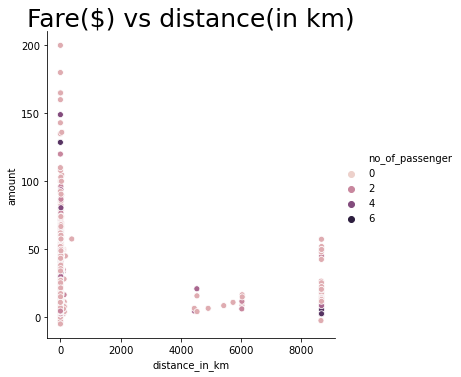

In [33]:
sns.relplot(data = df, kind = "scatter",x = "distance_in_km",y = "amount",
            hue = "no_of_passenger")
plt.title("Fare($) vs distance(in km)" , fontsize=25)
plt.show()

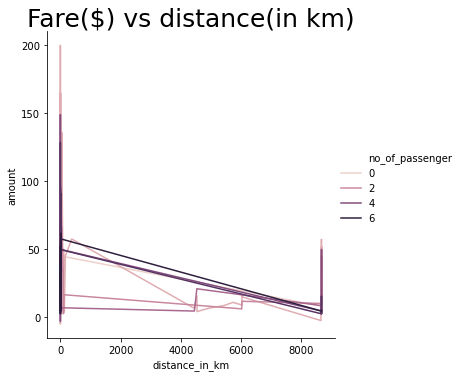

In [34]:
sns.relplot(data = df, kind = "line",x = "distance_in_km",y = "amount",
            hue = "no_of_passenger")
plt.title("Fare($) vs distance(in km)" , fontsize=25)
plt.show()

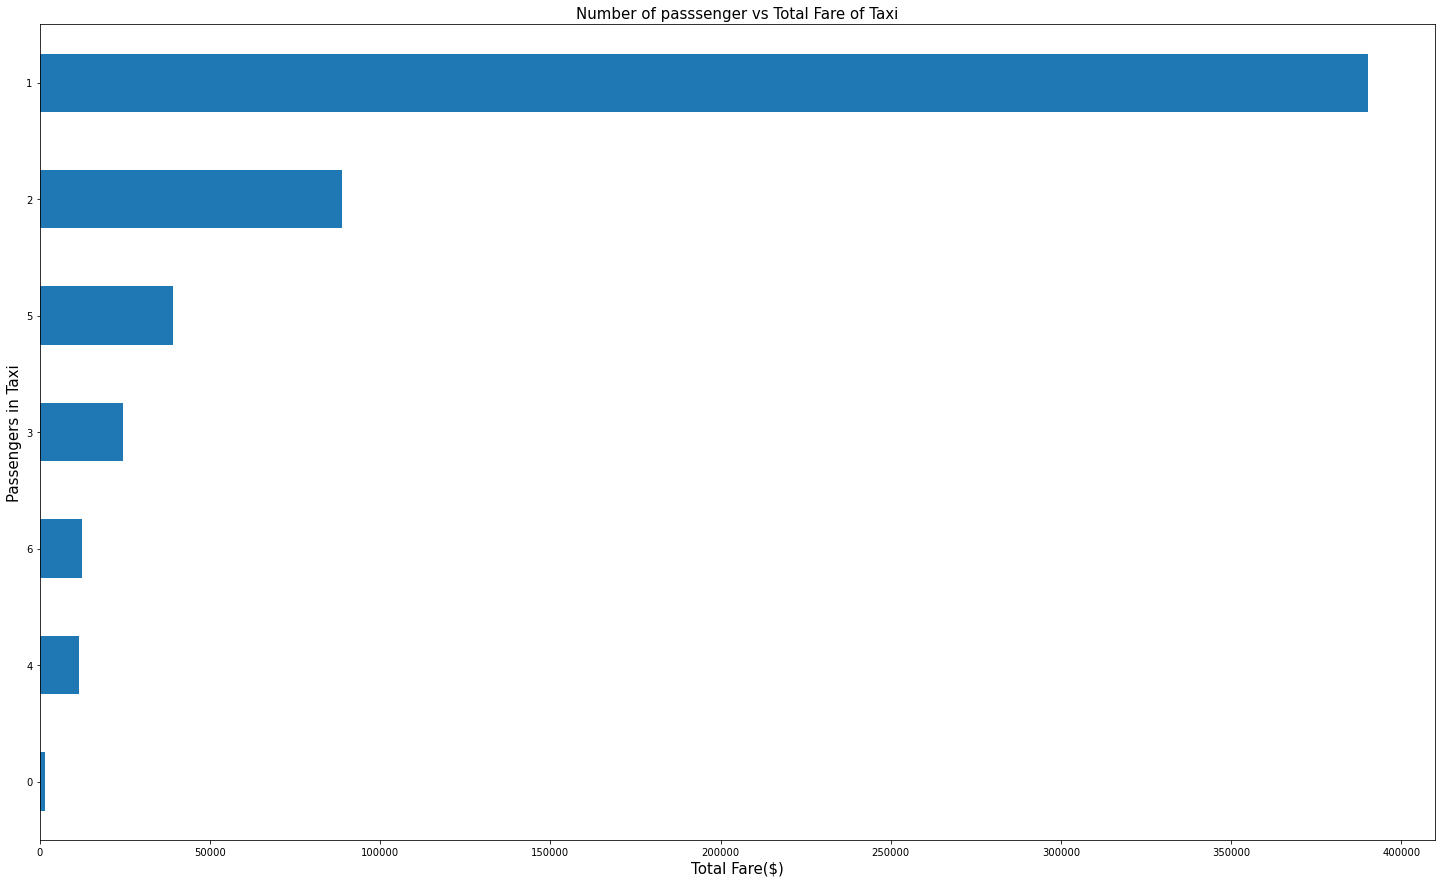

In [35]:
plt.figure(figsize=(25,15))
df.groupby("no_of_passenger")["amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =15)
plt.ylabel("Passengers in Taxi", fontsize =15)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

In [36]:
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance_in_km,day,Hour,Month_Day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,1.030764,0,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,8.450134,1,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.389525,3,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,2.799270,5,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.999157,1,7,9


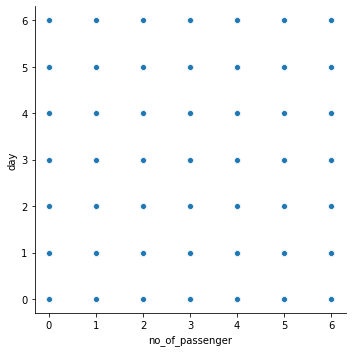

In [37]:
sns.relplot(x='no_of_passenger',y='day',data=df)

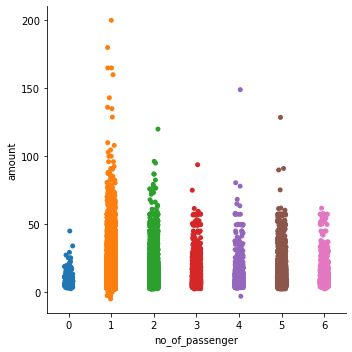

In [38]:
sns.catplot(x='no_of_passenger',y='amount',data=df)

In [39]:
# sns.catplot(x='day',y='amount',data=df,hue="no_of_passenger",kind ="swarm")

In [40]:
# sns.catplot(x='day',y='amount',data=df,hue="no_of_passenger",kind ="box")

In [41]:
# sns.catplot(x='day',y='amount',data=df,hue="no_of_passenger")

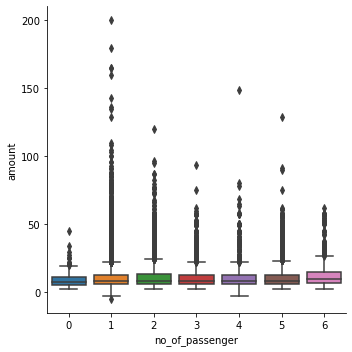

In [42]:
sns.catplot(x='no_of_passenger',y='amount',data=df,kind ="box")

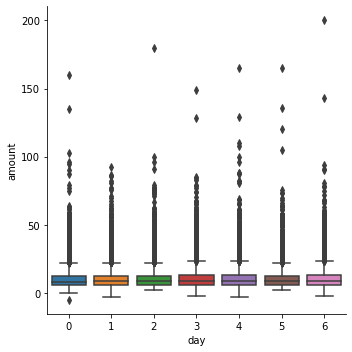

In [43]:
sns.catplot(x='day',y='amount',data=df,kind ="box")

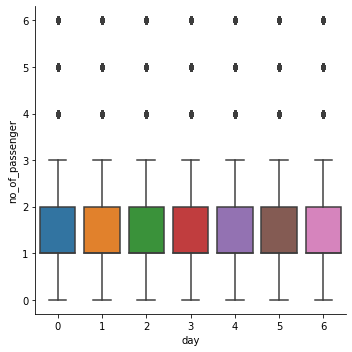

In [44]:
sns.catplot(x='day',y='no_of_passenger',data=df,kind ="box")

In [45]:
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance_in_km,day,Hour,Month_Day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,1.030764,0,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,8.450134,1,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.389525,3,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,2.799270,5,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.999157,1,7,9


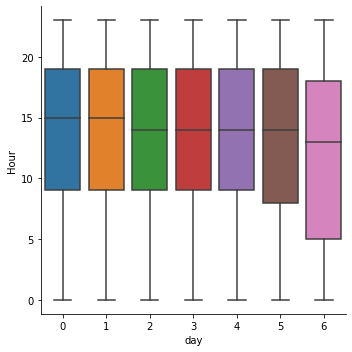

In [46]:
sns.catplot(x='day',y='Hour',data=df,kind ="box")

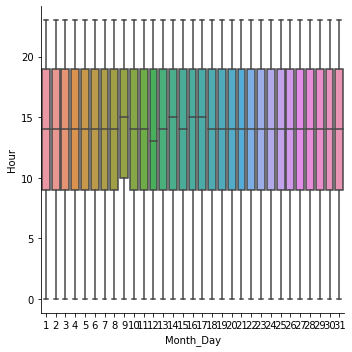

In [47]:
sns.catplot(x='Month_Day',y='Hour',data=df,kind ="box")

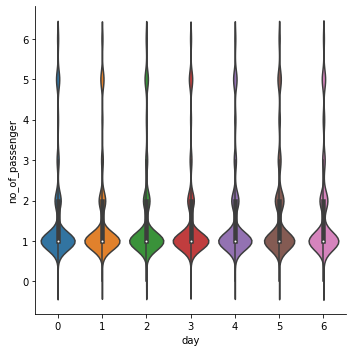

In [48]:
sns.catplot(x='day',y='no_of_passenger',data=df,kind ="violin")

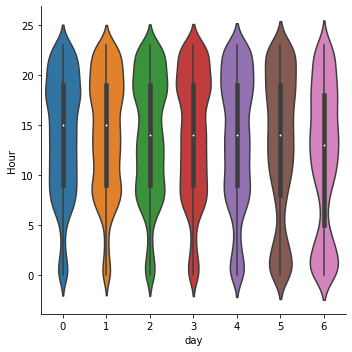

In [49]:
sns.catplot(x='day',y='Hour',data=df,kind ="violin")

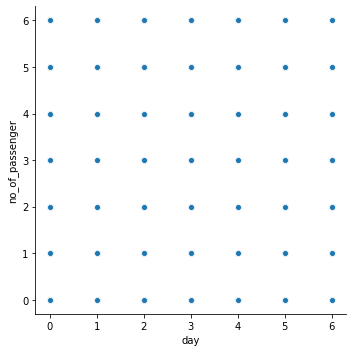

In [50]:
sns.relplot(x='day',y='no_of_passenger',data=df)

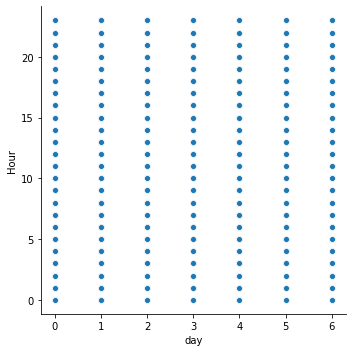

In [51]:
sns.relplot(x='day',y='Hour',data=df)

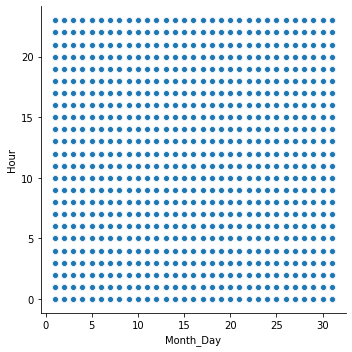

In [52]:
sns.relplot(x='Month_Day',y='Hour',data=df)

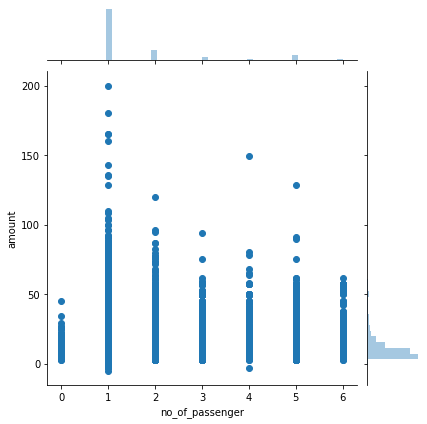

In [53]:
sns.jointplot(x='no_of_passenger',y='amount' , data=df)

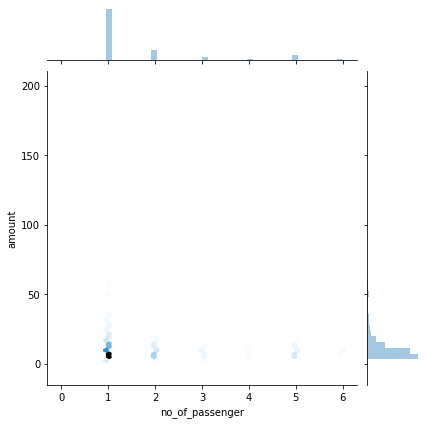

In [54]:
sns.jointplot(x='no_of_passenger',y='amount' , data=df ,kind='hex')

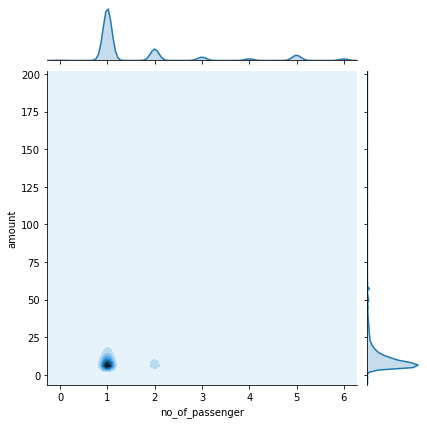

In [55]:
sns.jointplot(x='no_of_passenger',y='amount' , data=df ,kind='kde')

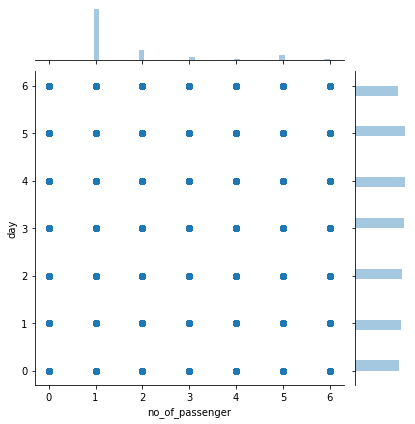

In [56]:
sns.jointplot(x='no_of_passenger',y='day' , data=df)

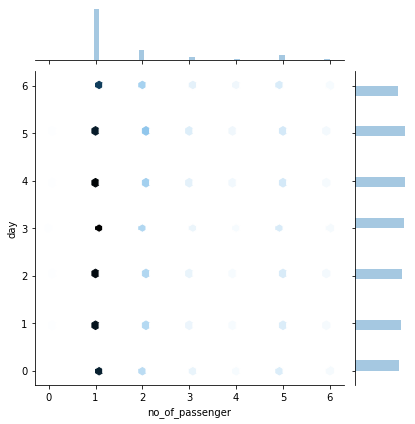

In [57]:
sns.jointplot(x='no_of_passenger',y='day' , data=df,kind="hex")

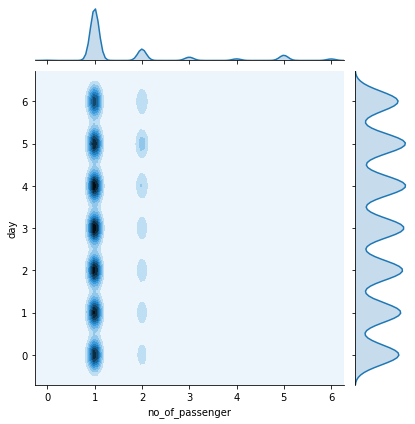

In [58]:
sns.jointplot(x='no_of_passenger',y='day' , data=df,kind="kde")

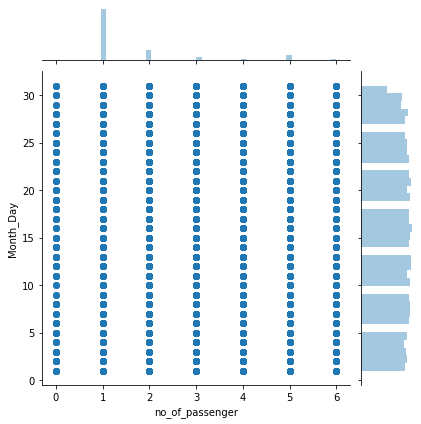

In [59]:
sns.jointplot(x='no_of_passenger',y='Month_Day' , data=df)


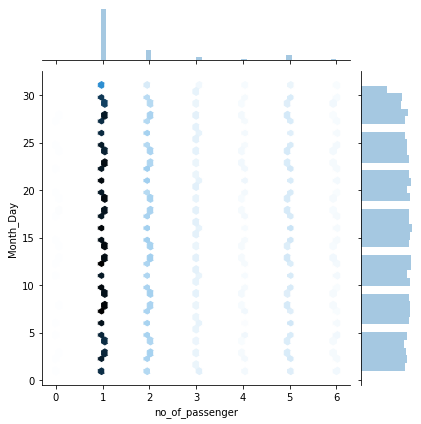

In [60]:
sns.jointplot(x='no_of_passenger',y='Month_Day' , data=df,kind="hex")


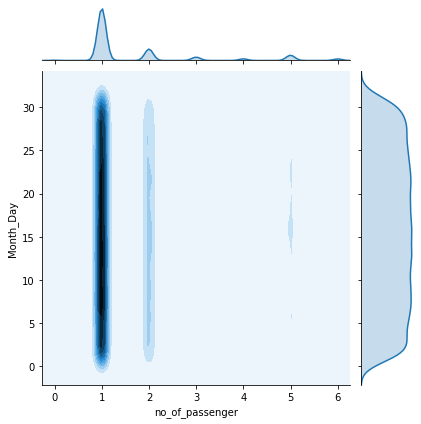

In [61]:
sns.jointplot(x='no_of_passenger',y='Month_Day' , data=df,kind="kde")


In [62]:
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance_in_km,day,Hour,Month_Day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,1.030764,0,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,8.450134,1,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.389525,3,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,2.799270,5,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.999157,1,7,9


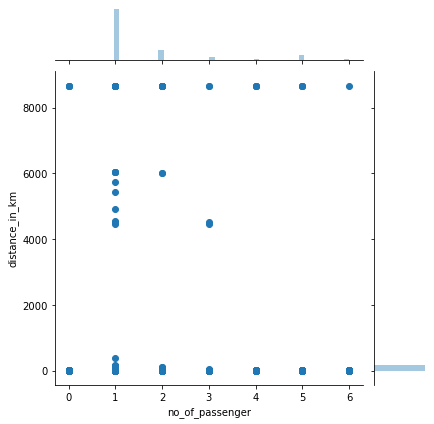

In [63]:
sns.jointplot(x='no_of_passenger',y='distance_in_km' , data=df)

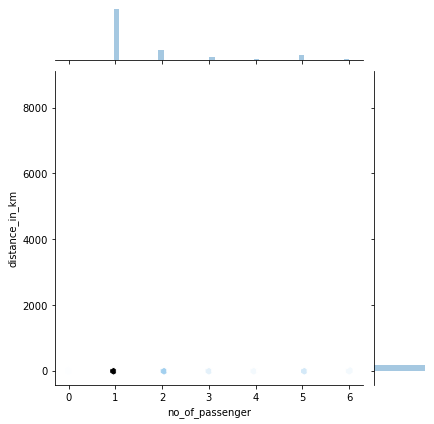

In [64]:
sns.jointplot(x='no_of_passenger',y='distance_in_km' , data=df,kind="hex")

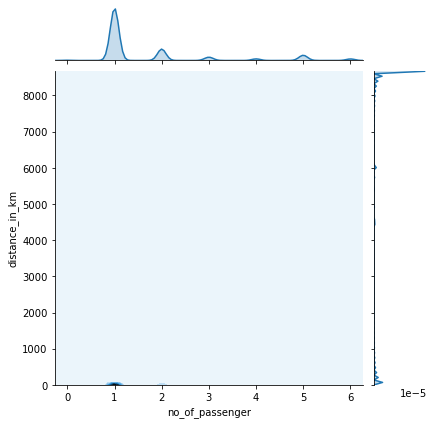

In [65]:
sns.jointplot(x='no_of_passenger',y='distance_in_km' , data=df,kind="kde")

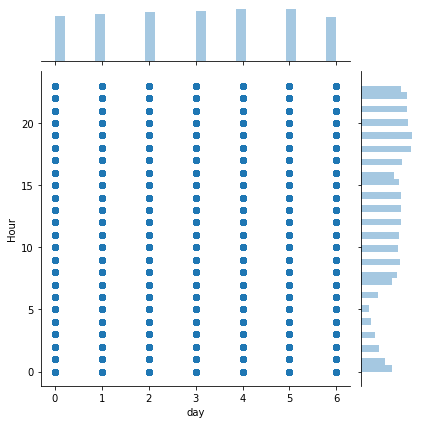

In [66]:
sns.jointplot(x='day',y='Hour' , data=df)


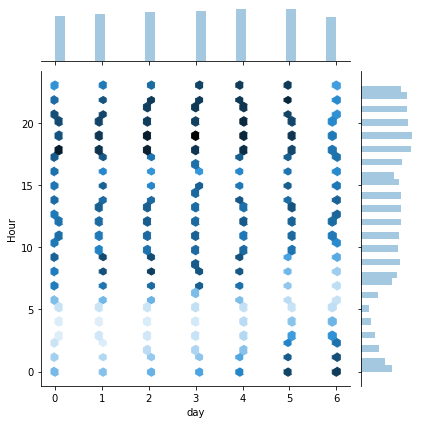

In [67]:
sns.jointplot(x='day',y='Hour' , data=df,kind="hex")

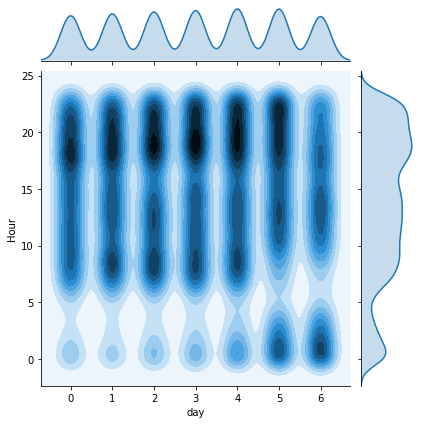

In [68]:
sns.jointplot(x='day',y='Hour' , data=df,kind="kde")

In [69]:
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance_in_km,day,Hour,Month_Day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,1.030764,0,17,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,8.450134,1,16,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.389525,3,0,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,2.799270,5,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.999157,1,7,9


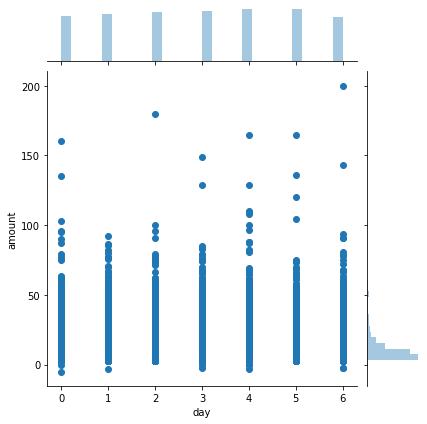

In [70]:
sns.jointplot(x='day',y='amount' , data=df)


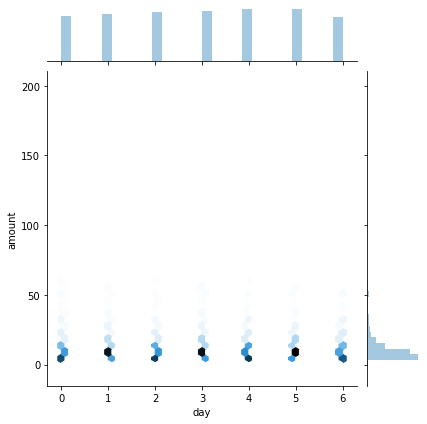

In [71]:
sns.jointplot(x='day',y='amount' , data=df,kind="hex")


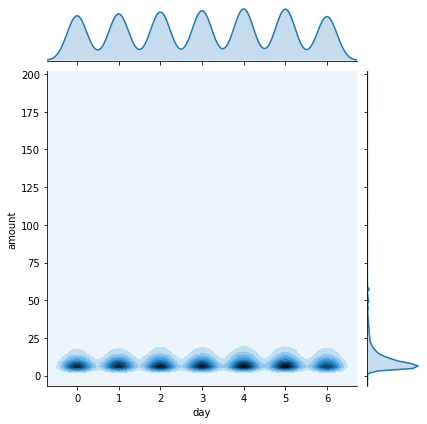

In [72]:
sns.jointplot(x='day',y='amount' , data=df,kind="kde")


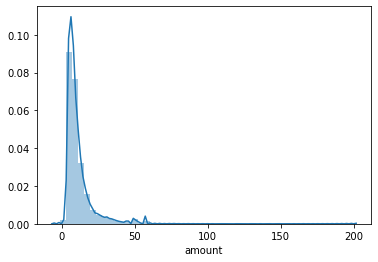

In [73]:
sns.distplot(df.amount)

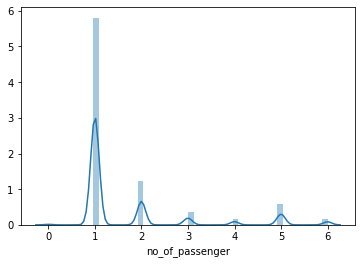

In [74]:
sns.distplot(df.no_of_passenger)

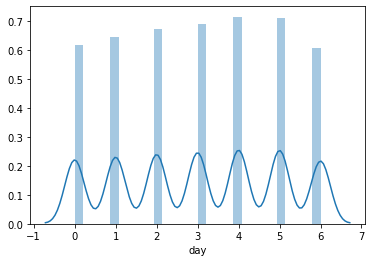

In [75]:
sns.distplot(df.day)

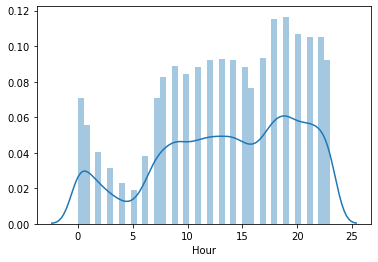

In [76]:
sns.distplot(df.Hour)

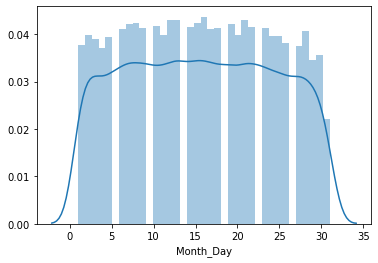

In [77]:
sns.distplot(df.Month_Day)

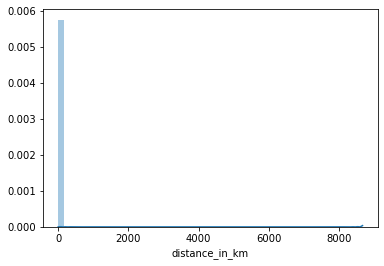

In [78]:
sns.distplot(df.distance_in_km)

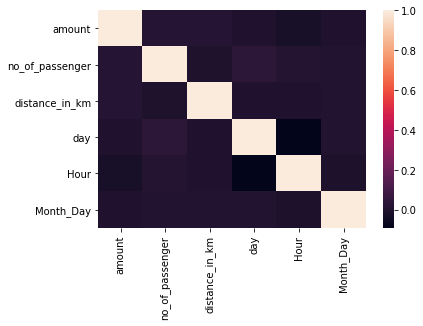

In [79]:
corr=df.corr()
sns.heatmap(corr)

In [80]:
df.describe(include="all")


,unique_id,amount,date_time_of_pickup,no_of_passenger,distance_in_km,day,Hour,Month_Day
count,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,3597,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,26:00.0,NaN,2011-09-03 01:30:00+00:00,NaN,NaN,NaN,NaN,NaN
freq,457,NaN,3,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2009-01-01 01:31:49+00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-06-30 22:42:39+00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.364171,NaN,1.667840,18.508946,3.029980,13.489080,15.672040
std,NaN,9.685557,NaN,1.289195,355.564309,1.956936,6.506935,8.660789
min,NaN,-5.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,6.000000,NaN,1.000000,1.223146,1.000000,9.000000,8.000000


In [81]:
df.dtypes

unique_id                           object
amount                             float64
date_time_of_pickup    datetime64[ns, UTC]
no_of_passenger                      int64
distance_in_km                     float64
day                                  int64
Hour                                 int64
Month_Day                            int64
dtype: object

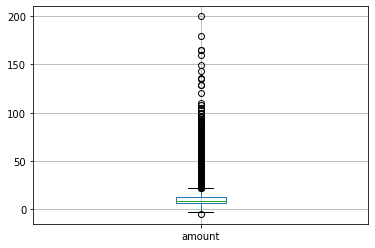

In [82]:
df.boxplot(column=["amount"])
plt.show()

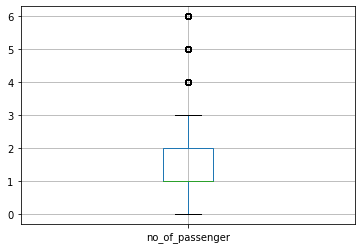

In [83]:
df.boxplot(column=["no_of_passenger"])
plt.show()

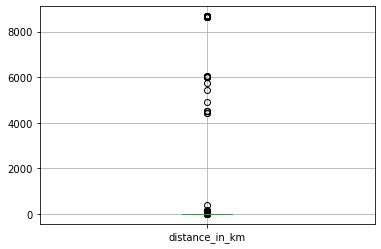

In [84]:
df.boxplot(column=["distance_in_km"])
plt.show()

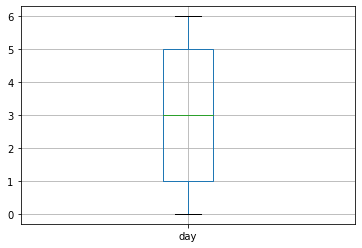

In [85]:
df.boxplot(column=["day"])
plt.show()

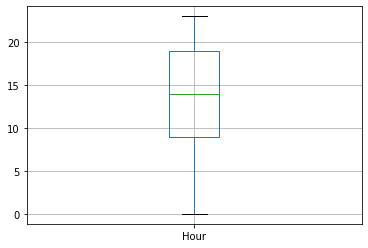

In [86]:
df.boxplot(column=["Hour"])
plt.show()

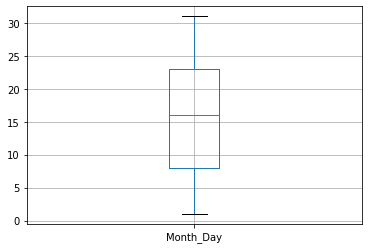

In [87]:
df.boxplot(column=["Month_Day"])
plt.show()

In [88]:
df.dtypes

unique_id                           object
amount                             float64
date_time_of_pickup    datetime64[ns, UTC]
no_of_passenger                      int64
distance_in_km                     float64
day                                  int64
Hour                                 int64
Month_Day                            int64
dtype: object

In [89]:
df.drop("date_time_of_pickup", axis=1, inplace=True)


In [90]:
df.drop("unique_id", axis=1, inplace=True)

# SPLITTING DATA

In [91]:
X=df.drop(['amount'],axis=1)

y=df[['amount']] 

In [92]:
X.head()

,no_of_passenger,distance_in_km,day,Hour,Month_Day
0,1,1.030764,0,17,15
1,1,8.450134,1,16,5
2,2,1.389525,3,0,18
3,1,2.799270,5,4,21
4,1,1.999157,1,7,9


In [93]:
y.head()

,amount
0,4.5
1,16.9
2,5.7
3,7.7
4,5.3


In [94]:

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=1)

In [95]:
mod1=LinearRegression()

mod1.fit(X_train,y_train)

LinearRegression()

In [96]:
mod1.score(X_train,y_train)

0.00147432231584943

In [97]:
mod1.score(X_test,y_test)

-0.0005008677601894274

In [98]:
from sklearn.svm import SVR

In [122]:
mod2=SVR(kernel='rbf',C=1,gamma=0.1)

mod2.fit(X_train,y_train)

SVR(C=1, gamma=0.1)

In [123]:
mod2.score(X_train,y_train)

0.5843721374700885

In [124]:
mod2.score(X_test,y_test)

0.561918271530688

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

pol=PolynomialFeatures(degree=2,interaction_only=True)
x_train2=pol.fit_transform(X_train)
x_test2=pol.fit_transform(X_test)

poly_clf=linear_model.LinearRegression()
poly_clf.fit(x_train2,y_train)



LinearRegression()

In [103]:
print(poly_clf.score(x_train2, y_train))

0.001707860578449183


In [104]:
print(poly_clf.score(x_test2,y_test))

-0.0005925064103387001


In [105]:
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings('ignore')

In [106]:
mod3=BaggingRegressor(n_estimators=100,max_samples=0.01,max_features=0.99)

In [107]:
mod3.fit(X_train,y_train)

BaggingRegressor(max_features=0.99, max_samples=0.01, n_estimators=100)

In [108]:
mod3.score(X_train,y_train)

0.6785746353828581

In [109]:
mod3.score(X_test,y_test)

0.6630918484445596

In [110]:
from sklearn.ensemble import AdaBoostRegressor
mod4=AdaBoostRegressor(n_estimators=59,learning_rate=1.2,)
mod4.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=1.2, n_estimators=59)

In [111]:
mod4.score(X_train,y_train)

0.5879608686314635

In [112]:
mod4.score(X_test,y_test)

0.5455501493133523

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
mod5=GradientBoostingRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=30)
mod5.fit(X_train,y_train)

GradientBoostingRegressor(min_samples_leaf=30, min_samples_split=15,
                          n_estimators=400)

In [114]:
mod5.score(X_train,y_train)

0.763934596399568

In [115]:
mod5.score(X_test,y_test)

0.7179181467985798

In [116]:
from sklearn.ensemble import RandomForestRegressor

mod6=RandomForestRegressor(n_estimators=160,min_samples_leaf=6,min_samples_split=100,)
mod6.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=6, min_samples_split=100,
                      n_estimators=160)

In [117]:
mod6.score(X_train,y_train)

0.7638831995731563

In [118]:
mod6.score(X_test,y_test)

0.7186450057835758

In [119]:
from sklearn.tree import DecisionTreeRegressor
mod7 = DecisionTreeRegressor(criterion='mse',min_samples_split=95, min_samples_leaf=55, )
mod7.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=55, min_samples_split=95)

In [125]:
mod7.score(X_train,y_train)

0.7520022564704967

In [121]:
mod7.score(X_test,y_test)

0.7169695572336322

#              

RANDOM FOREST HAS THE HIGHEST SCORE